# 필요 라이브러리 불러오기

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [37]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/boston.csv')

In [38]:
# 데이터를 먼저 확인해봅시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 군집화

군집화를 통해서 비슷한 성향을 가진 그룹을 찾아보자.

In [39]:
# 범주형 데이터 제거
del data['chas']

In [40]:
# 나중에 비교를 위한 medv 컬럼도 복사 후 제거를 해둡니다.
medv = data['medv']
del data['medv']

In [41]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축해보자.
# 필요 라이브러리를 불러옵니다.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
# 정규화 진행
# 객체 생성
scaler = StandardScaler()


In [44]:
# 데이터 학습
scaler.fit(data)
# 변환
scaler_data = scaler.transform(data)

In [45]:
# 객체 생성
pca = PCA(n_components=2)

In [46]:
# PCA 학습시키기
pca.fit(scaler_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
# 결과값 확인
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [48]:
# 데이터 프레임 형태로 변환
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns=['pc1','pc2'])


In [49]:
data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# 몇 개로 군집화를 해야할까?

- 위의 데이터를 몇 개의 군집화로 나누는것이 가장 올바른 군집화인지 살펴보자

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [50]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

In [51]:
x = []
y = [] 

for k in range(1,30):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data2) # 응집도

  x.append(k)
  y.append(kmeans.inertia_)

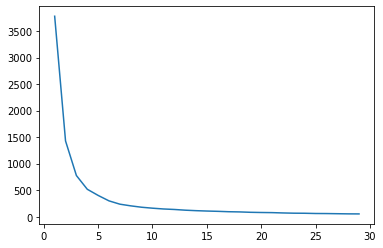

In [52]:
# 그래프 그리기
plt.plot(x,y)

# ELBOW POINT 4 지정 후 클러스터링 시작

In [53]:
kmeans = KMeans(n_clusters=4)

In [54]:
kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
data2['labels'] = kmeans.predict(data2)

In [56]:
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,3
1,-1.456003,-0.947694,3
2,-2.073454,-0.625336,3
3,-2.610161,-0.134044,3
4,-2.456866,-0.229919,3


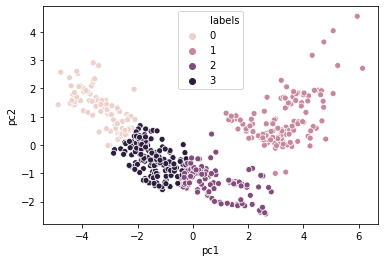

In [57]:
sns.scatterplot(x='pc1', y='pc2', hue = 'labels', data=data2)

# 클러스터링 결과 해석하기

pca와 클러스터링을 통해 결과를 해석해봅시다.

가장 먼저 어떠한 그룹이 집 값이 높은지 평균을 비교합니다.

In [58]:
# 맨 처음 떼어 두었던 medv 컬럼을 추가합니다.
data2['medv'] = medv

In [59]:
data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,3,24.0
1,-1.456003,-0.947694,3,21.6
2,-2.073454,-0.625336,3,34.7
3,-2.610161,-0.134044,3,33.4
4,-2.456866,-0.229919,3,36.2


In [65]:
# 시각화를 위해 각 그룹별 medv값을 따로 변수로 생성합니다.

medv_0 = data2[data2['labels'] == 0]['medv'].mean()
medv_1 = data2[data2['labels'] == 1]['medv'].mean()
medv_2 = data2[data2['labels'] == 2]['medv'].mean()
medv_3 = data2[data2['labels'] == 3]['medv'].mean()

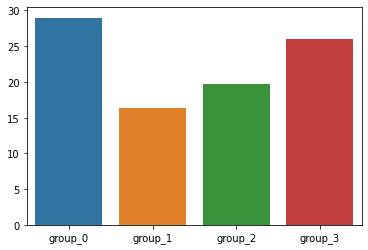

In [66]:
sns.barplot(x = ['group_0','group_1','group_2','group_3'], y= [medv_0,medv_1,medv_2,medv_3])

# 그룹들의 특징을 살펴보자

최상위 그룹과 최하위 그룹의 특징을 살펴보며 집 값이 높은 이유 혹은 집 값이 낮은 이유에 대해서 살펴보겠습니다.

### 최상위층 - 0번그룹
### 최하위층 - 1번그룹

In [67]:
# 원본 데이터에 라벨을 복제합니다.
data['labels'] = data2['labels']

In [68]:
# 각 그룹의 데이터를 나누어서 변수에 담습니다.
group = data[(data['labels'] == 1) | (data['labels'] == 0)]

In [69]:
group = group.groupby('labels').mean().reset_index()

In [70]:
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0,0.065128,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409
1,1,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358


# 시각화를 위한 subplot

`plt.subplots(행, 열, figsize=())`

여러가지의 그림을 그리는 방법입니다.

In [72]:

column = group.columns

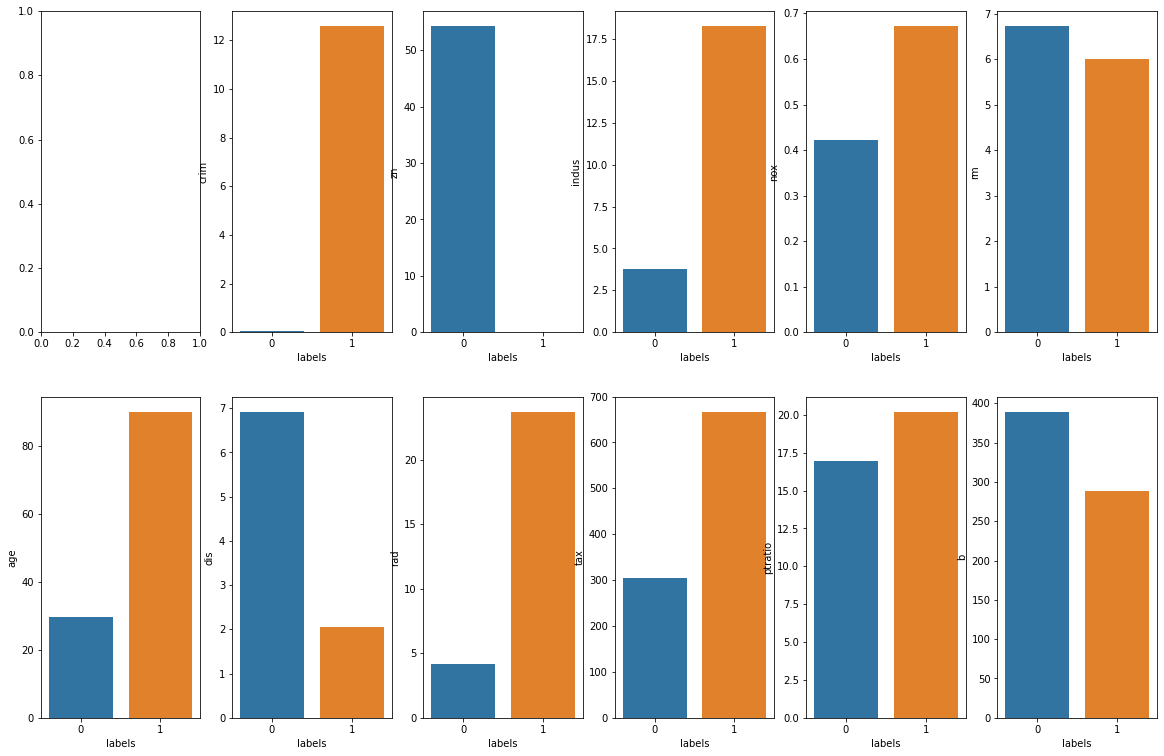

In [73]:


f, ax = plt.subplots(2, 6, figsize=(20, 13))

for i in range(1, 12) :
    sns.barplot(x = 'labels', y = column[i], data = group, ax = ax[i//6, i%6])





# 결론

그래프에서 보이다 싶이 범죄율이 낮을 수록, 25,000 평방피트를 초과 거주지역 비율이 높을수록 좋은 가격을 나타내는 지역임을 알 수 있습니다다.

또한, 두가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징들을 살펴볼 수 있습니다.
